In [32]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

Import Datasets

In [2]:
# Đọc synthetic dataset (train.csv)
syn_df= pd.read_csv('train.csv')
syn_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15635502.0,Pirozzi,632.0,France,Female,63.0,5.0,0.00,2.0,0.0,1.0,140780.80,0.0
1,1,15595440.0,Horsley,730.0,Germany,Female,35.0,5.0,182532.23,2.0,1.0,1.0,136491.32,0.0
2,2,15803566.0,Zito,598.0,Spain,Male,45.0,2.0,94049.92,1.0,1.0,1.0,131718.12,0.0
3,3,15693906.0,Iloerika,678.0,France,Female,38.0,9.0,0.00,2.0,1.0,1.0,164768.82,0.0
4,4,15679531.0,K'ung,710.0,France,Female,32.0,4.0,0.00,2.0,0.0,0.0,100187.43,0.0


In [3]:
# Bỏ cột id, CustomerId, Surname
drop_cols = ['id', 'CustomerId', 'Surname']
syn_df = syn_df.drop(drop_cols, axis=1)
syn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,632.0,France,Female,63.0,5.0,0.00,2.0,0.0,1.0,140780.80,0.0
1,730.0,Germany,Female,35.0,5.0,182532.23,2.0,1.0,1.0,136491.32,0.0
2,598.0,Spain,Male,45.0,2.0,94049.92,1.0,1.0,1.0,131718.12,0.0
3,678.0,France,Female,38.0,9.0,0.00,2.0,1.0,1.0,164768.82,0.0
4,710.0,France,Female,32.0,4.0,0.00,2.0,0.0,0.0,100187.43,0.0


In [4]:
# Đọc original dataset (Churn_Modelling.csv)
original_df = pd.read_csv('Churn_Modelling.csv')
original_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [5]:
# Bỏ cột RowNumber, CustomerId, Surname
drop_cols = ['RowNumber', 'CustomerId', 'Surname']
original_df = original_df.drop(drop_cols, axis=1)
original_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [6]:
# Đọc file test data (test.csv)
test_df = pd.read_csv('test.csv')
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15737792.0,Chiazagomekpere,727.0,France,Female,32.0,6.0,0.0,2.0,1.0,1.0,180969.55
1,15001,15808846.0,Ts'ai,690.0,France,Male,38.0,4.0,0.0,1.0,1.0,0.0,56780.97
2,15002,15652693.0,Manna,535.0,France,Female,31.0,7.0,118235.7,1.0,0.0,1.0,28407.40
3,15003,15602572.0,Chukwukadibia,638.0,Spain,Male,51.0,8.0,0.0,1.0,0.0,0.0,118570.53
4,15004,15684269.0,T'ien,584.0,Spain,Male,29.0,9.0,0.0,2.0,1.0,0.0,35795.85


In [7]:
syn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      15000 non-null  float64
 1   Geography        15000 non-null  object 
 2   Gender           15000 non-null  object 
 3   Age              15000 non-null  float64
 4   Tenure           15000 non-null  float64
 5   Balance          15000 non-null  float64
 6   NumOfProducts    15000 non-null  float64
 7   HasCrCard        15000 non-null  float64
 8   IsActiveMember   15000 non-null  float64
 9   EstimatedSalary  15000 non-null  float64
 10  Exited           15000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 1.3+ MB


In [8]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Geography        10001 non-null  object 
 2   Gender           10002 non-null  object 
 3   Age              10001 non-null  float64
 4   Tenure           10002 non-null  int64  
 5   Balance          10002 non-null  float64
 6   NumOfProducts    10002 non-null  int64  
 7   HasCrCard        10001 non-null  float64
 8   IsActiveMember   10001 non-null  float64
 9   EstimatedSalary  10002 non-null  float64
 10  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.7+ KB


I. TIỀN XỬ LÝ DỮ LIỆU

LÀM SẠCH DỮ LIỆU

In [9]:
# Kiểm tra NaN values trong Synthetic Dataset 

# Get the number of missing data points per column
missing_values_count = syn_df.isnull().sum()

# How many total missing values do we have?
total_cells = np.product(syn_df.shape)
total_missing = missing_values_count.sum()

# Percentage of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(f'{percent_missing}% Synthetic DataFrame có chứa missing values.')

0.0% Synthetic DataFrame có chứa missing values.


In [10]:
missing_values_count = original_df.isnull().sum()

total_cells = np.product(original_df.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print(f'{percent_missing}% Original DataFrame có chứa missing values.')

0.003635636509061824% Original DataFrame có chứa missing values.


Như vậy:

+ syn_df không chứa giá trị bị thiếu.

+ original_df có 4 dòng chứa giá trị bị thiếu ở một thuộc tính.

+ Số lượng dòng chứa giá trị bị thiếu chiếm tỷ lệ rất nhỏ so với bộ dữ liệu (0.003635636509061824%).

Do đó, áp dụng cách xử lý là bỏ những dòng có giá trị bị thiếu này.

In [11]:
original_df = original_df.dropna()
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9998 non-null   int64  
 1   Geography        9998 non-null   object 
 2   Gender           9998 non-null   object 
 3   Age              9998 non-null   float64
 4   Tenure           9998 non-null   int64  
 5   Balance          9998 non-null   float64
 6   NumOfProducts    9998 non-null   int64  
 7   HasCrCard        9998 non-null   float64
 8   IsActiveMember   9998 non-null   float64
 9   EstimatedSalary  9998 non-null   float64
 10  Exited           9998 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.3+ KB


Như vậy, đến bước này:

+ Synthetic DataFrame có 15000 dòng.

+ Original DataFrame có 9998 dòng.

HỢP NHẤT DỮ LIỆU

+ Kết hợp dữ liệu từ Synthetic DataFrame và Original DataFrame.

+ Trước hết, cần kiểm tra xem 2 bộ dữ liệu có nhất quán hay không.


In [12]:
# Xác định những thuộc tính nào là thuộc tính phân loại và thuộc tính số (liên tục) ở Synthetic Dataset 
# dựa vào ngưỡng số giá trị unique của thuộc tính
categorical_vars = []
continuous_vars = []

for col in syn_df.columns:
    unique_vals = syn_df[col].unique()
    if len(unique_vals) <= 10:  # Ngưỡng là 10, nghĩa là thuộc tính phân loại có ít hơn hoặc bằng 10 giá trị unique
        categorical_vars.append(col)
    else:
        continuous_vars.append(col)

print('Unique values của các thuộc tính phân loại: synthetic dataset')
for i in categorical_vars:
    values = syn_df[i].unique()
    values.sort()
    print(f'{i}: ', *values, sep='\t')

Unique values của các thuộc tính phân loại: synthetic dataset
Geography: 	France	Germany	Spain
Gender: 	Female	Male
NumOfProducts: 	1.0	2.0	3.0	4.0
HasCrCard: 	0.0	1.0
IsActiveMember: 	0.0	1.0
Exited: 	0.0	1.0


In [13]:
# Xác định những thuộc tính phân loại và liên tục ở Original Dataset, bổ sung nếu có
for col in original_df.columns:
    unique_vals = original_df[col].unique()
    if len(unique_vals) <= 10 and col not in categorical_vars:  
        categorical_vars.append(col)
    elif col not in categorical_vars and col not in continuous_vars:
        continuous_vars.append(col)

print('Unique values của các thuộc tính phân loại: original dataset')
for i in categorical_vars:
    values = original_df[i].unique()
    values.sort()
    print(f'{i}: ', *values, sep='\t')

print()
print(f'Categorical Variables: ', *categorical_vars, sep='\t')
print(f'Continuous Variables: ', *continuous_vars, sep='\t')

Unique values của các thuộc tính phân loại: original dataset
Geography: 	France	Germany	Spain
Gender: 	Female	Male
NumOfProducts: 	1	2	3	4
HasCrCard: 	0.0	1.0
IsActiveMember: 	0.0	1.0
Exited: 	0	1

Categorical Variables: 	Geography	Gender	NumOfProducts	HasCrCard	IsActiveMember	Exited
Continuous Variables: 	CreditScore	Age	Tenure	Balance	EstimatedSalary


+ Hợp nhất 2 DataFrame lại với nhau thành df

In [14]:
df = pd.concat([syn_df, original_df], axis =0)

df = df.sample(frac = 1).reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      24998 non-null  float64
 1   Geography        24998 non-null  object 
 2   Gender           24998 non-null  object 
 3   Age              24998 non-null  float64
 4   Tenure           24998 non-null  float64
 5   Balance          24998 non-null  float64
 6   NumOfProducts    24998 non-null  float64
 7   HasCrCard        24998 non-null  float64
 8   IsActiveMember   24998 non-null  float64
 9   EstimatedSalary  24998 non-null  float64
 10  Exited           24998 non-null  float64
dtypes: float64(9), object(2)
memory usage: 2.1+ MB


In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,684.0,France,Male,41.0,9.0,0.00,2.0,1.0,0.0,115509.59,0.0
1,602.0,France,Male,33.0,2.0,0.00,2.0,1.0,0.0,85439.73,0.0
2,830.0,Germany,Female,40.0,8.0,77701.64,1.0,0.0,1.0,19512.38,0.0
3,652.0,Spain,Female,40.0,7.0,100471.34,1.0,1.0,1.0,124550.88,0.0
4,627.0,France,Male,39.0,9.0,0.00,2.0,0.0,1.0,67840.81,0.0


TÓM TẮT HÓA DỮ LIỆU

+ Thống kê mô tả

In [16]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,24998.000000,24998.000000,24998.000000,2.499800e+04,24998.000000,24998.000000,24998.000000,2.499800e+04,24998.000000
mean,655.510201,38.280584,5.035043,5.696098e+04,1.561645,0.753300,0.502440,1.108868e+05,0.204056
std,83.721132,9.198132,2.829271,1.160245e+05,0.551123,0.431099,0.500004,6.443564e+04,0.403018
min,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.157000e+01,0.000000
25%,596.000000,32.000000,3.000000,0.000000e+00,1.000000,1.000000,0.000000,7.151540e+04,0.000000
50%,657.000000,37.000000,5.000000,0.000000e+00,2.000000,1.000000,1.000000,1.151415e+05,0.000000
75%,711.000000,43.000000,7.000000,1.197795e+05,2.000000,1.000000,1.000000,1.533568e+05,0.000000
max,850.000000,92.000000,15.000000,1.545434e+07,4.000000,1.000000,1.000000,6.090906e+06,1.000000


+ Vẽ biểu đồ phân phối và biểu đồ hộp của những thuộc tính có giá trị số

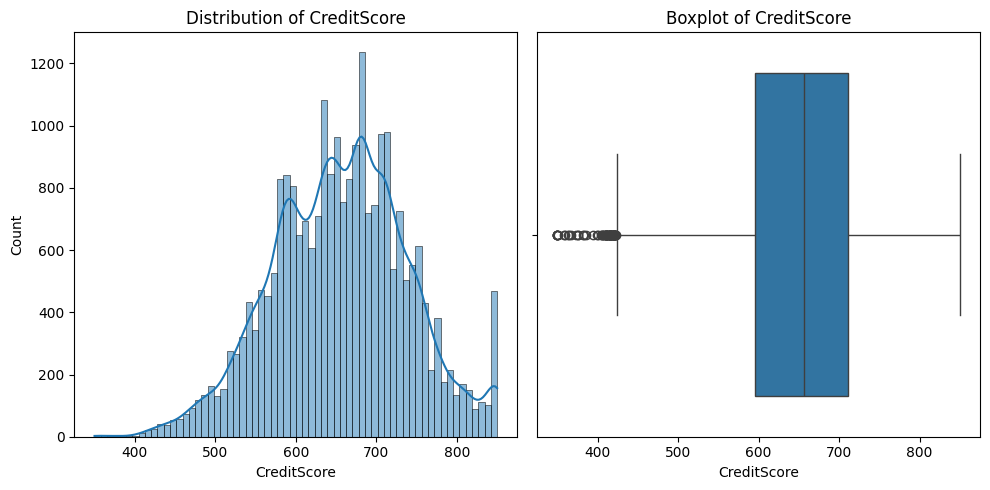

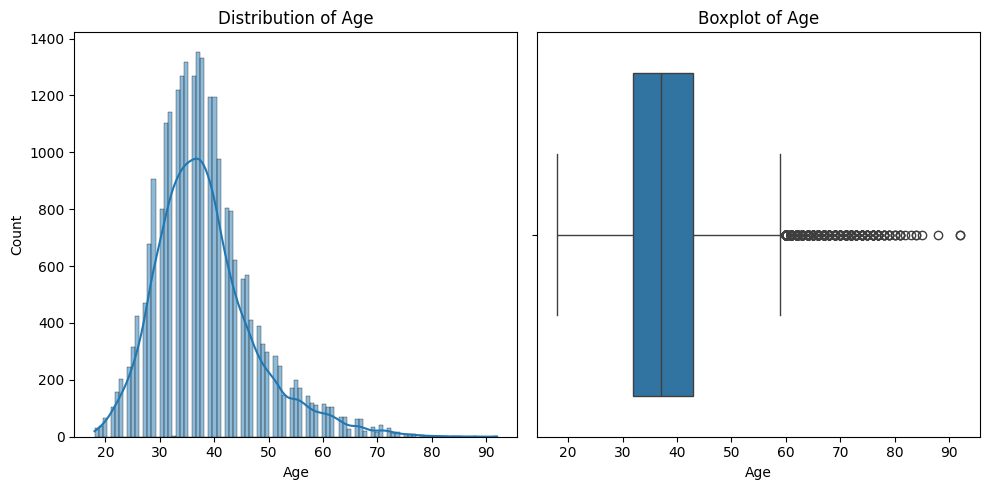

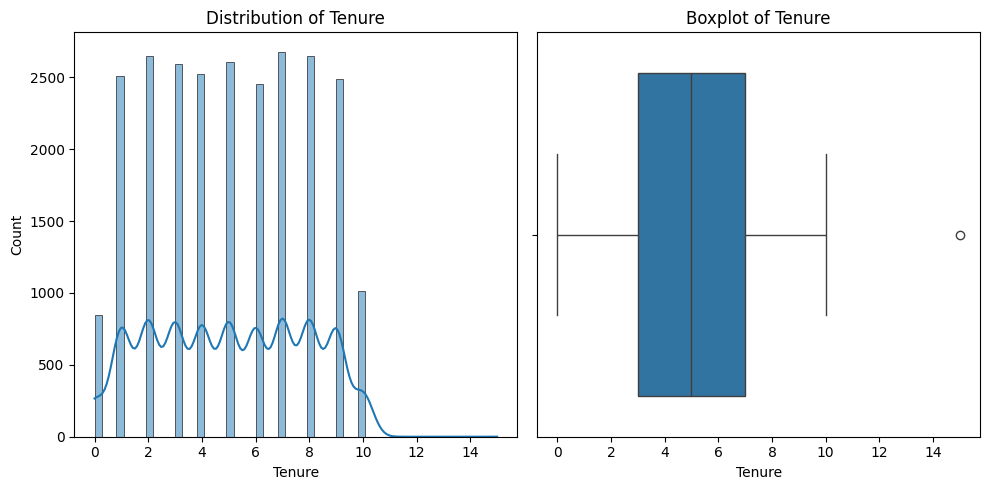

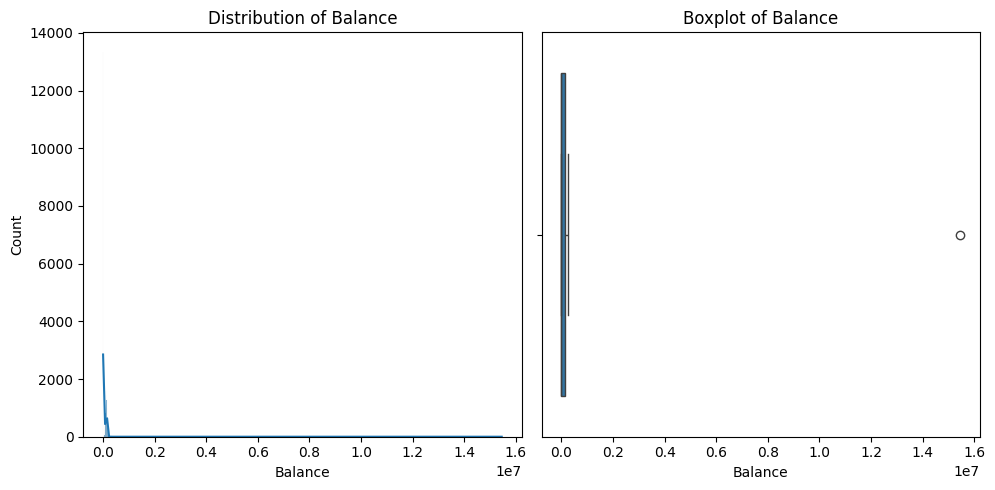

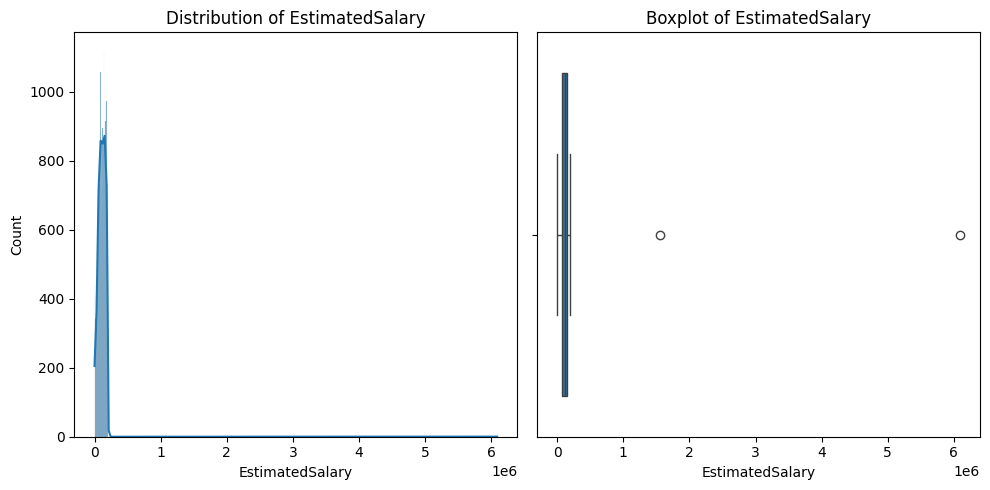

In [17]:
columns_to_plot = df[continuous_vars].columns

for i, column in enumerate(columns_to_plot):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    
    sns.histplot(x=column, data=df, kde=True)
    plt.title(f'Distribution of {column}')

    plt.subplot(1, 2, 2)

    sns.boxplot(x=column, data=df)
    plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

+ Vẽ biểu đồ tròn và biểu cồ cột đối với các thuộc tính phân loại

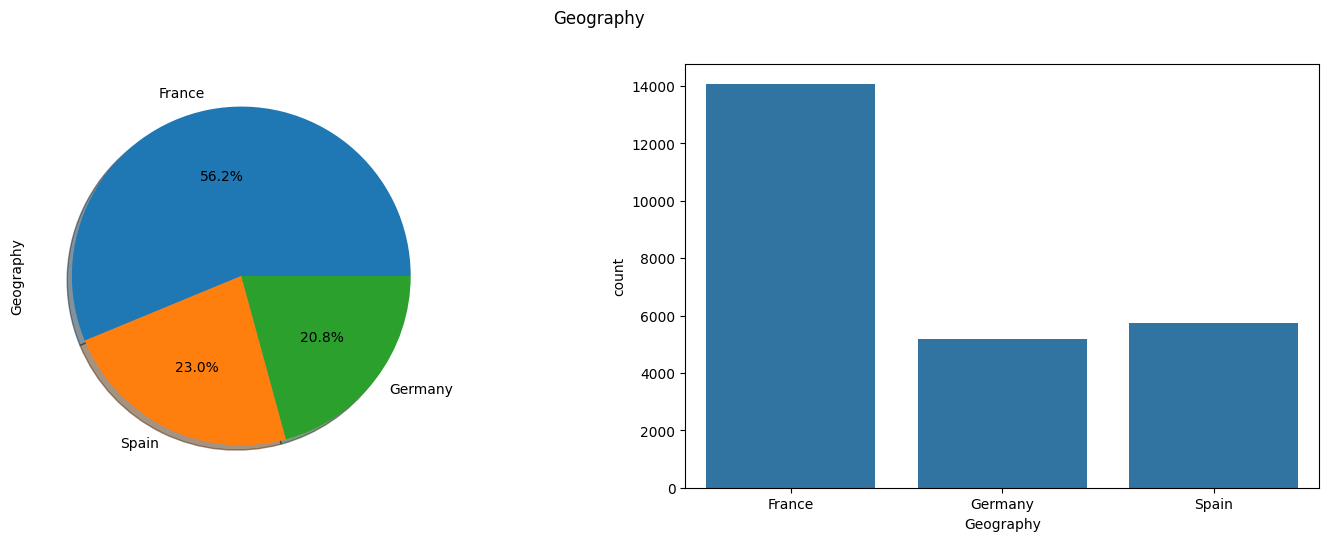

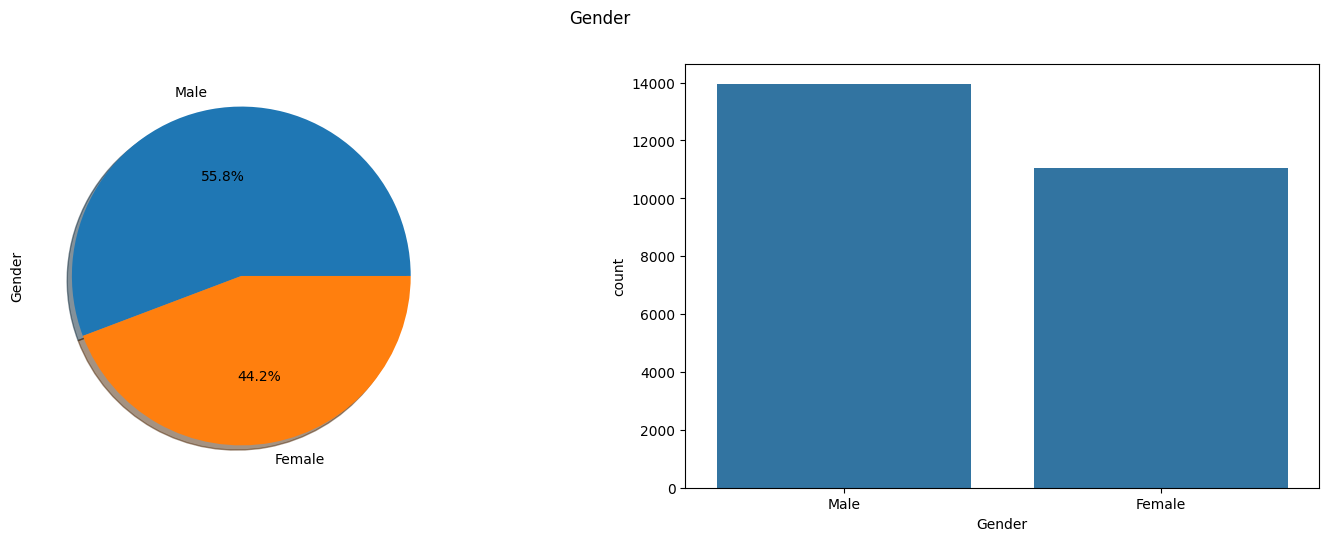

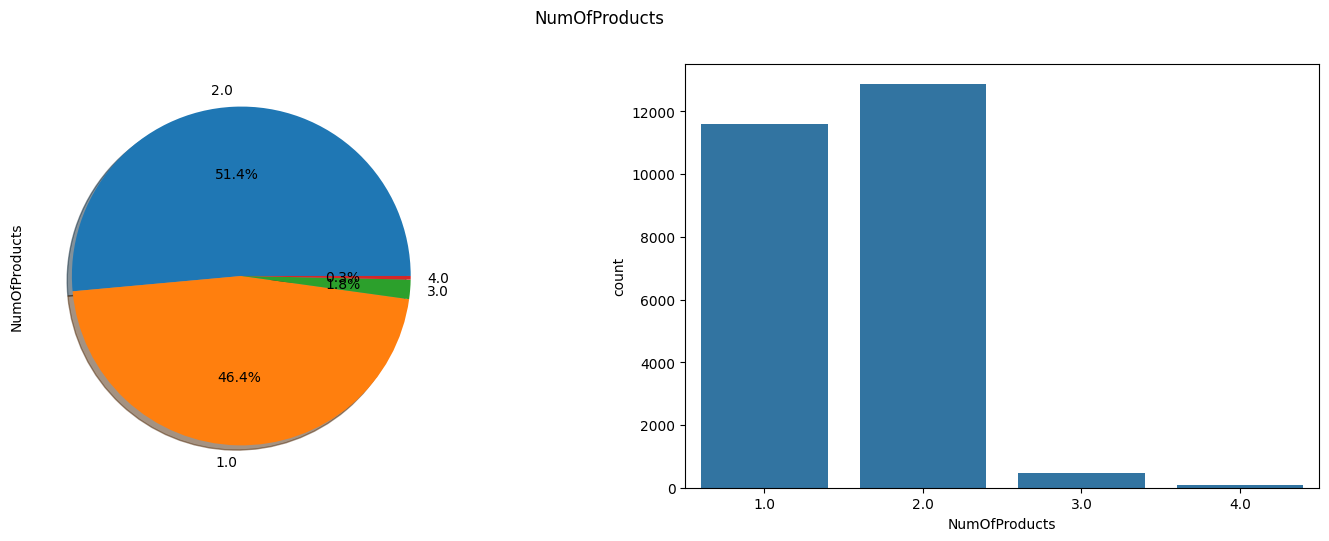

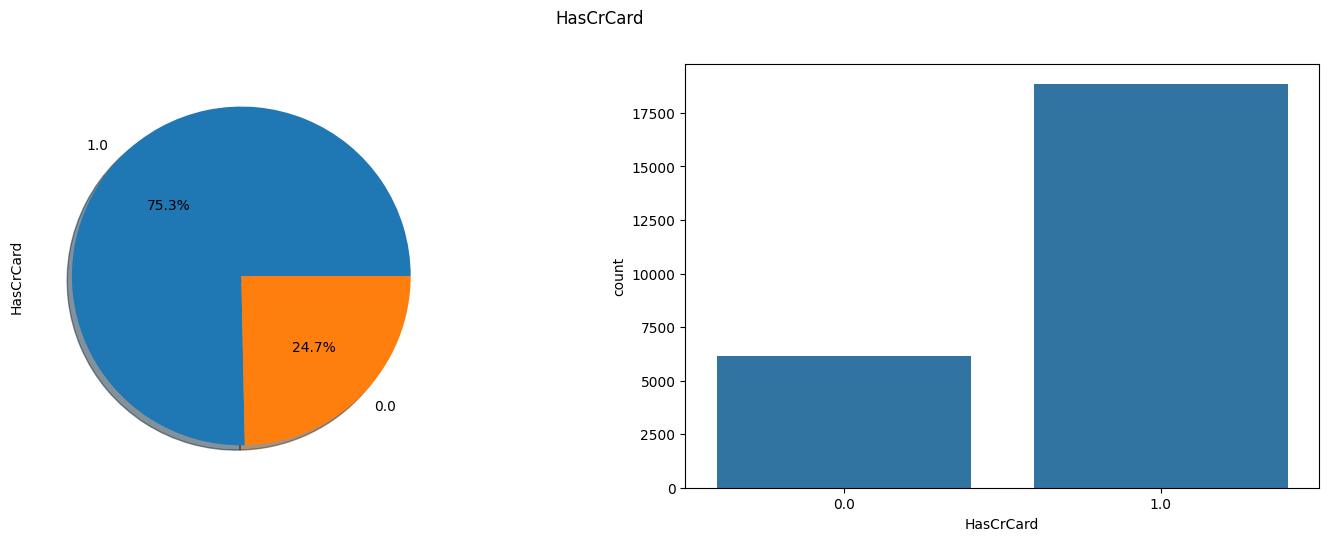

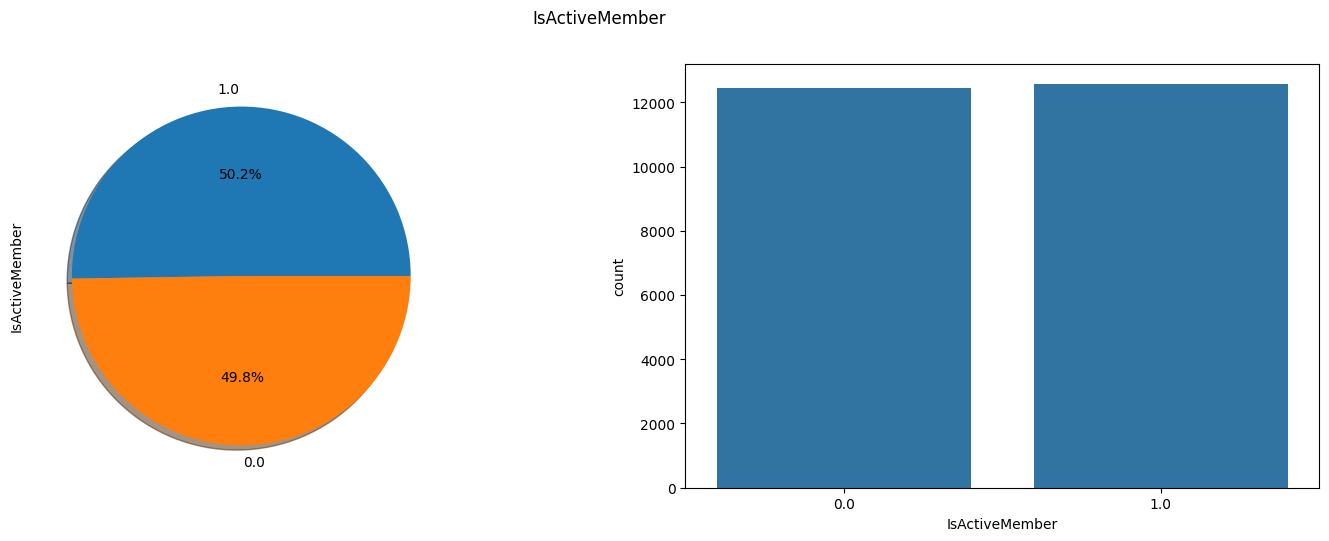

In [18]:
categorical_vars.remove('Exited')

for column in categorical_vars:
    f, ax=plt.subplots(1,2,figsize=(18,5.5))
    df[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=df,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

+ Vẽ biểu đồ tròn và biểu đồ cột đối với biến mục tiêu "Exited"

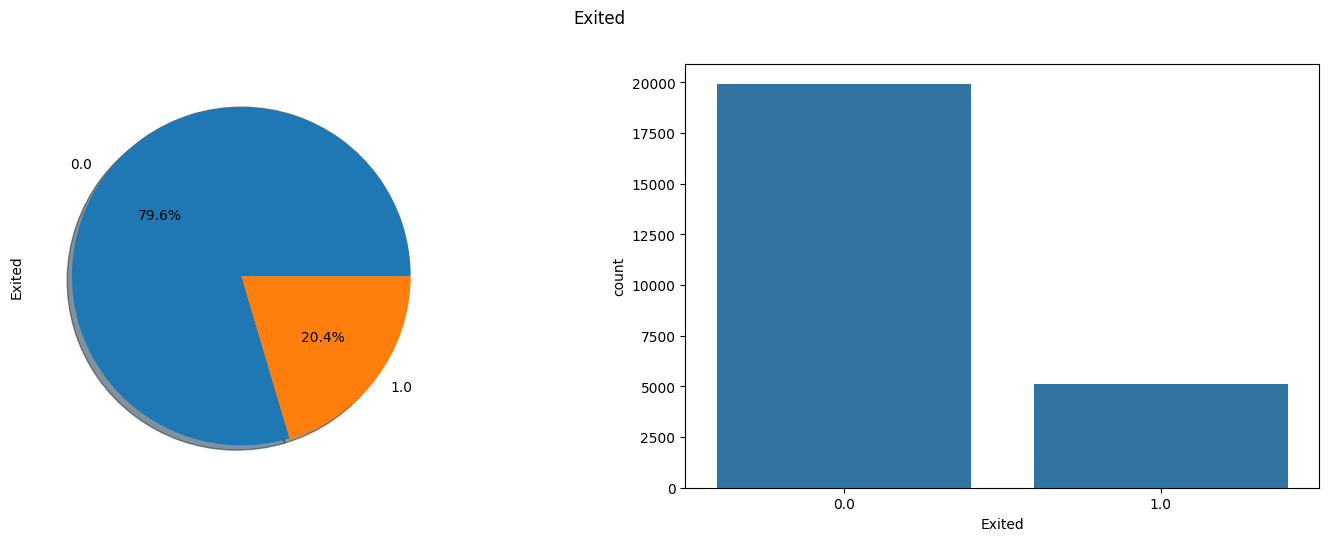

In [19]:
f, ax = plt.subplots(1,2,figsize=(18,5.5))
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_ylabel(f'{'Exited'}')
sns.countplot(x='Exited',data=df,ax=ax[1])
plt.suptitle(f'{'Exited'}')
plt.show()

+ Vẽ biểu đồ nhiệt (heatmap) thể hiện sự tương quan giữa các biến có giá trị số dựa trên hệ số tương quan.

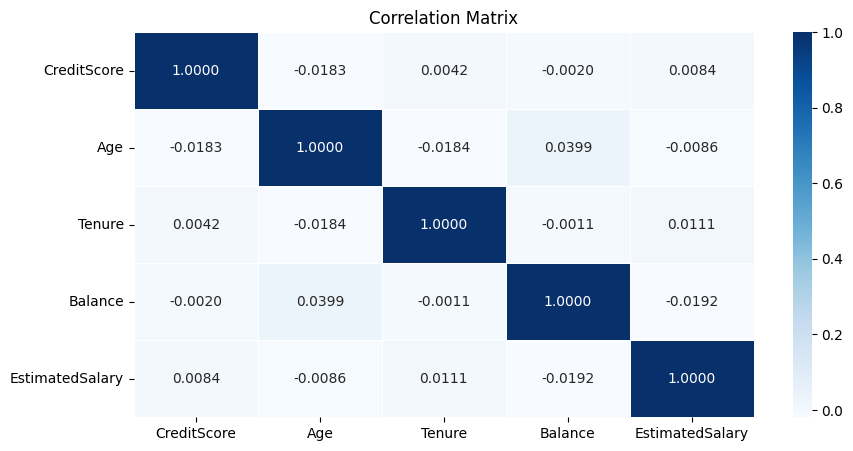

In [20]:
# Tạo một bản sao của DataFrame chỉ chứa các biến số
df1 = df[continuous_vars].copy()

# Tính ma trận tương quan
corr_matrix = df1.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".4f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

II. XÂY DỰNG MÔ HÌNH

In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, make_scorer, classification_report, roc_curve, auc
from tabulate import tabulate

In [22]:
# Chia tập dữ liệu thành X và y
X = df.drop(['Exited'], axis=1)
y = df['Exited']

# Chia dữ liệu huấn luyện thành Training và Validation Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

CHUYỂN ĐỔI DỮ LIỆU

In [23]:
# Tạo bộ biến đổi cho các cột numeric và categorical
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Kết hợp các bộ biến đổi vào một ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, continuous_vars),
        ('cat', categorical_transformer, categorical_vars)
    ])

Xây dựng mô hình và Tìm ra bộ tham số tối ưu đối với từng mô hình

In [33]:
# Khởi tạo các mô hình
models = {
    'decision_tree': DecisionTreeClassifier(),
    'logistic_regression': LogisticRegression(),
    'neural_network': MLPClassifier(),
    'random_forest': RandomForestClassifier(),
    'gradient_boosting': GradientBoostingClassifier(),
    'xgboost': XGBClassifier()
}

# Định nghĩa dải giá trị cho các tham số
param_distributions = {
    'decision_tree': {
        'classifier__max_depth': [3, 5, 10, None],
        'classifier__min_samples_split': [2, 5, 10],
    },
    'logistic_regression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear'],
    },
    'neural_network': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__alpha': np.logspace(-4, 4, 20),
    },
    'random_forest': {
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_depth': [4, 6, 8, None],
    },
    'gradient_boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.5],
        'classifier__max_depth': [3, 5, 7],
    },
    'xgboost': {
        'classifier__n_estimators': [100, 200, 500],
        'classifier__learning_rate': [0.01, 0.1, 0.5],
        'classifier__max_depth': [3, 5, 7],
    }
}

# Thiết lập Stratified K-Fold
skf = StratifiedKFold(n_splits=5)

# Khởi tạo danh sách để lưu kết quả
results = []

# Dùng RandomizedSearchCV để tìm mô hình và tham số tối ưu
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    search = RandomizedSearchCV(pipeline, param_distributions[model_name], n_iter=20, 
                                cv=skf, scoring='roc_auc', verbose=1, n_jobs=-1, random_state=0)
    
    search.fit(X_train, y_train)
    
    # Lưu kết quả
    results.append({
        'model': model_name,
        'best_score': search.best_score_,
        'best_params': search.best_params_,
        'best_estimator': search.best_estimator_
    })

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


III. ĐÁNH GIÁ MÔ HÌNH

+ Dùng mô hình với những tham số tối ưu trên để dự đoán Validation Data.

+ Tính các chỉ số đánh giá hiệu suất mô hình, ma trận nhầm lẫn và vẽ biểu đồ đường cong ROC đối với từng mô hình.

Model: DECISION_TREE

{'classifier__min_samples_split': 2, 'classifier__max_depth': 5}

ROC AUC: 0.8873

Classification Report:
+--------------+--------------------+---------------------+--------------------+---------+
|              |     precision      |       recall        |      f1-score      | support |
+--------------+--------------------+---------------------+--------------------+---------+
|     0.0      | 0.8818770226537217 | 0.9585427135678392  | 0.9186130508066458 | 3980.0  |
|     1.0      | 0.755192878338279  | 0.49901960784313726 | 0.6009445100354192 | 1020.0  |
|   accuracy   |       0.8648       |       0.8648        |       0.8648       | 0.8648  |
|  macro avg   | 0.8185349504960003 | 0.7287811607054882  | 0.7597787804210325 | 5000.0  |
| weighted avg | 0.8560334572133713 |       0.8648        | 0.8538086684893155 | 5000.0  |
+--------------+--------------------+---------------------+--------------------+---------+


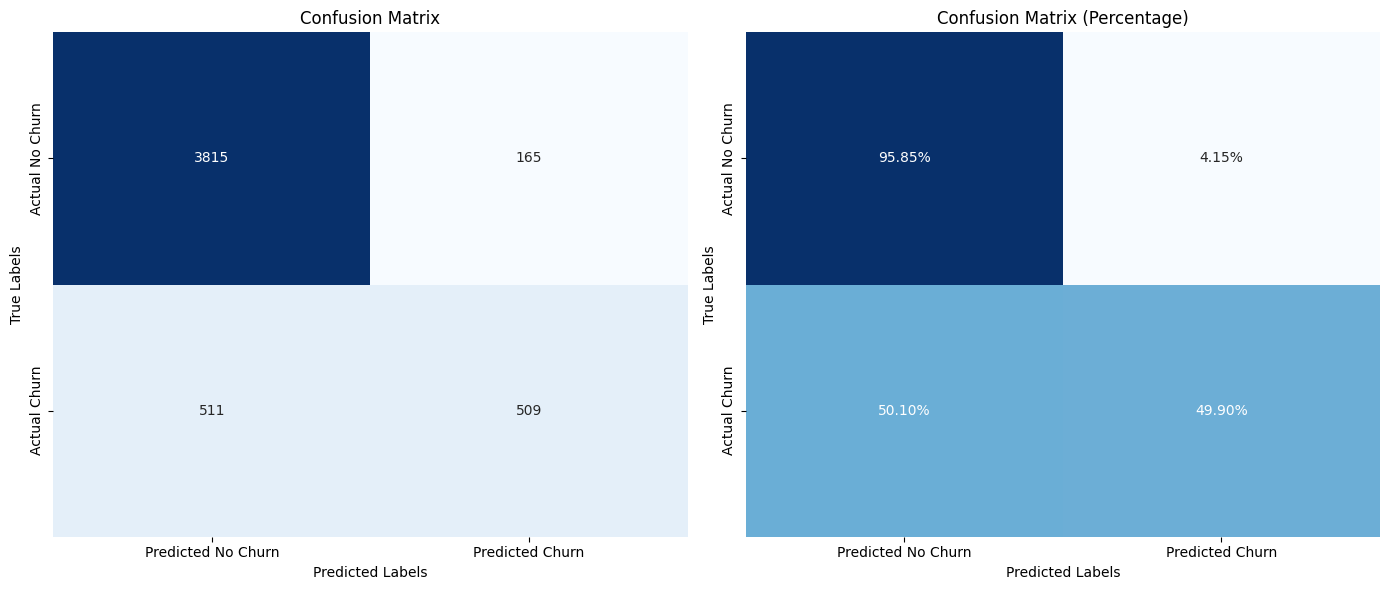

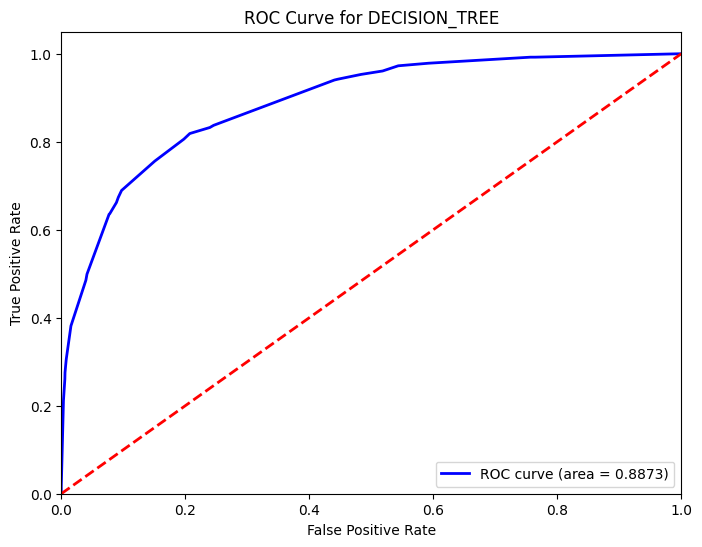

Model: LOGISTIC_REGRESSION

{'classifier__solver': 'liblinear', 'classifier__penalty': 'l1', 'classifier__C': 1}

ROC AUC: 0.8874

Classification Report:
+--------------+--------------------+--------------------+--------------------+---------+
|              |     precision      |       recall       |      f1-score      | support |
+--------------+--------------------+--------------------+--------------------+---------+
|     0.0      | 0.8893867924528301 | 0.9474874371859296 | 0.9175182481751825 | 3980.0  |
|     1.0      |       0.725        | 0.5401960784313725 | 0.6191011235955056 | 1020.0  |
|   accuracy   |       0.8644       |       0.8644       |       0.8644       | 0.8644  |
|  macro avg   | 0.8071933962264151 | 0.7438417578086511 | 0.768309685885344  | 5000.0  |
| weighted avg | 0.8558518867924527 |       0.8644       | 0.8566411547609283 | 5000.0  |
+--------------+--------------------+--------------------+--------------------+---------+


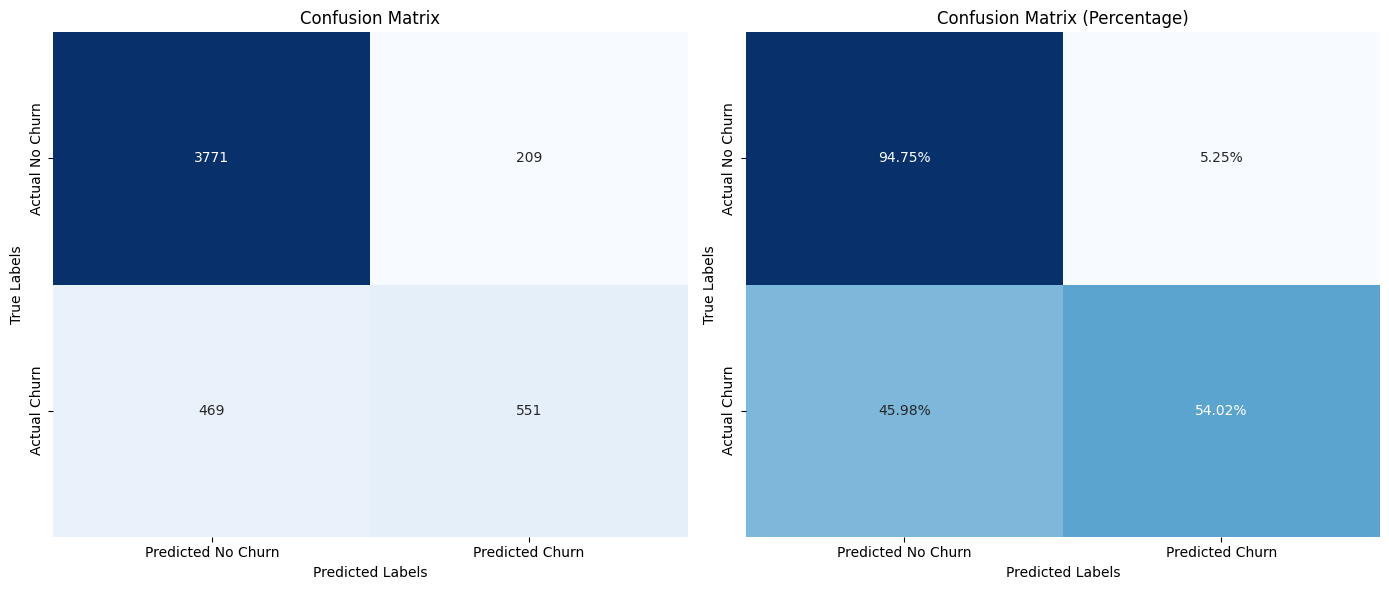

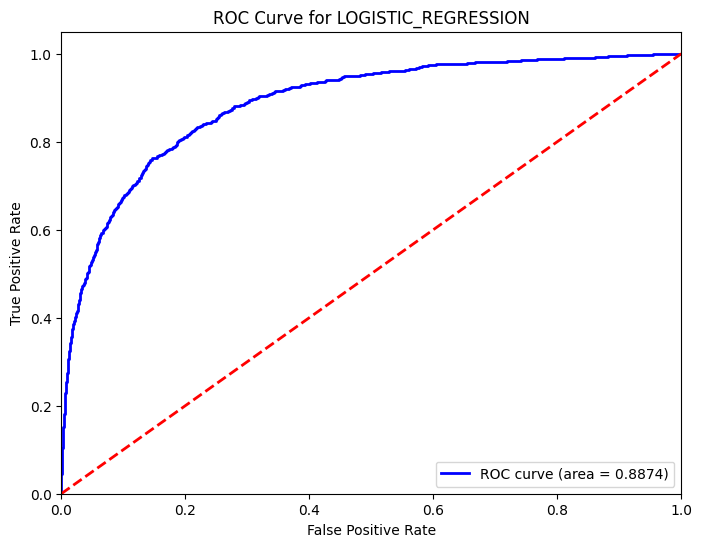

Model: NEURAL_NETWORK

{'classifier__hidden_layer_sizes': (100,), 'classifier__alpha': 0.08858667904100823}

ROC AUC: 0.9121

Classification Report:
+--------------+--------------------+--------------------+--------------------+---------+
|              |     precision      |       recall       |      f1-score      | support |
+--------------+--------------------+--------------------+--------------------+---------+
|     0.0      | 0.9015421115065243 | 0.9547738693467337 | 0.9273947528981086 | 3980.0  |
|     1.0      | 0.7707006369426752 | 0.5931372549019608 | 0.6703601108033241 | 1020.0  |
|   accuracy   |       0.881        |       0.881        |       0.881        |  0.881  |
|  macro avg   | 0.8361213742245998 | 0.7739555621243472 | 0.7988774318507164 | 5000.0  |
| weighted avg | 0.874850450695499  |       0.881        | 0.8749596859107726 | 5000.0  |
+--------------+--------------------+--------------------+--------------------+---------+


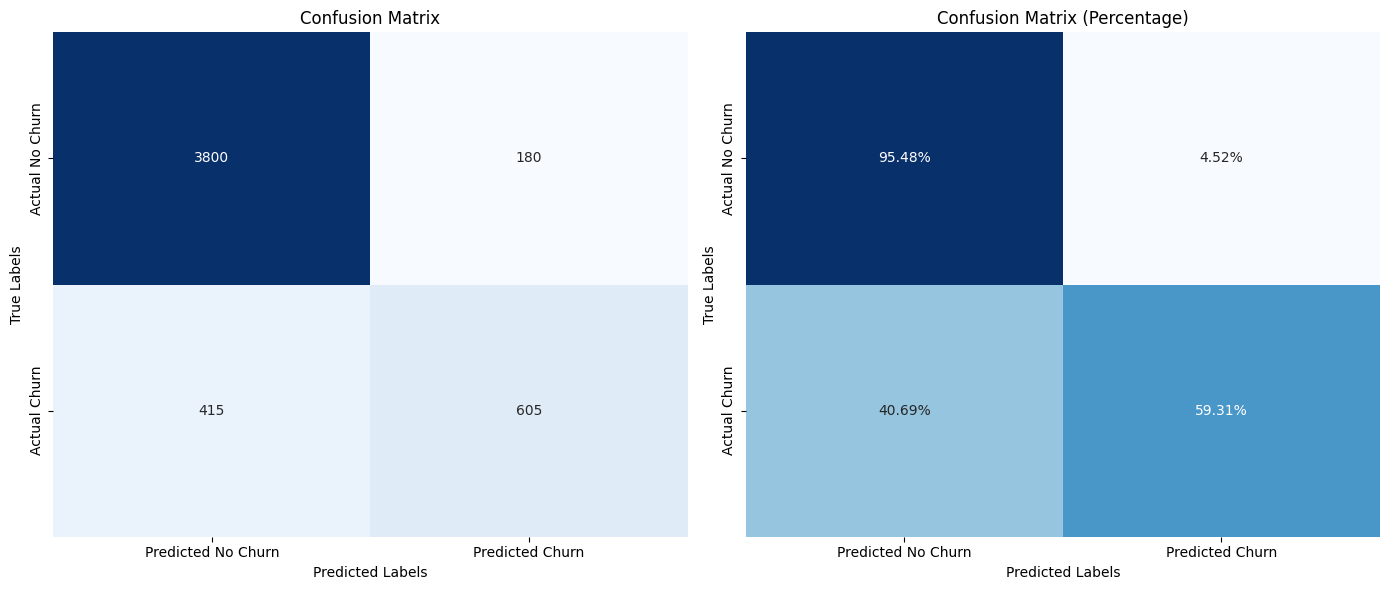

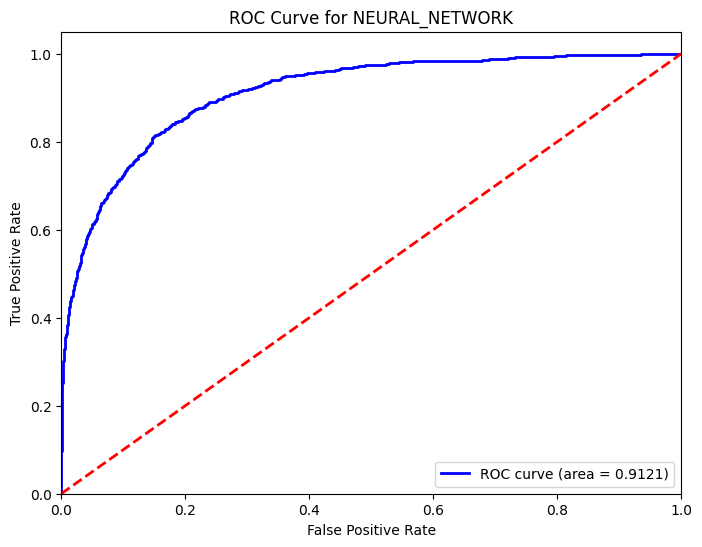

Model: RANDOM_FOREST

{'classifier__n_estimators': 500, 'classifier__max_depth': 8}

ROC AUC: 0.9078

Classification Report:
+--------------+--------------------+--------------------+--------------------+---------+
|              |     precision      |       recall       |      f1-score      | support |
+--------------+--------------------+--------------------+--------------------+---------+
|     0.0      | 0.8930978387171741 | 0.9655778894472362 | 0.9279246649764578 | 3980.0  |
|     1.0      | 0.8034433285509326 | 0.5490196078431373 | 0.652300524170064  | 1020.0  |
|   accuracy   |       0.8806       |       0.8806       |       0.8806       | 0.8806  |
|  macro avg   | 0.8482705836340534 | 0.7572987486451868 | 0.7901125945732609 | 5000.0  |
| weighted avg | 0.8748083186432608 |       0.8806       | 0.8716973402519534 | 5000.0  |
+--------------+--------------------+--------------------+--------------------+---------+


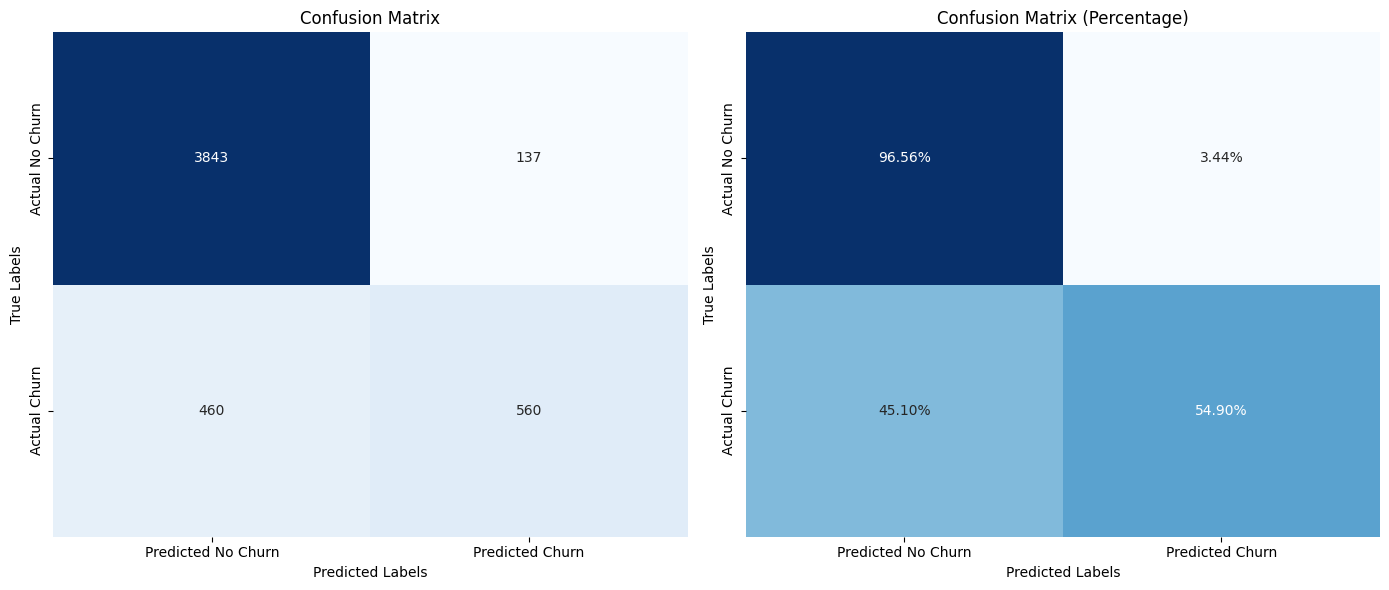

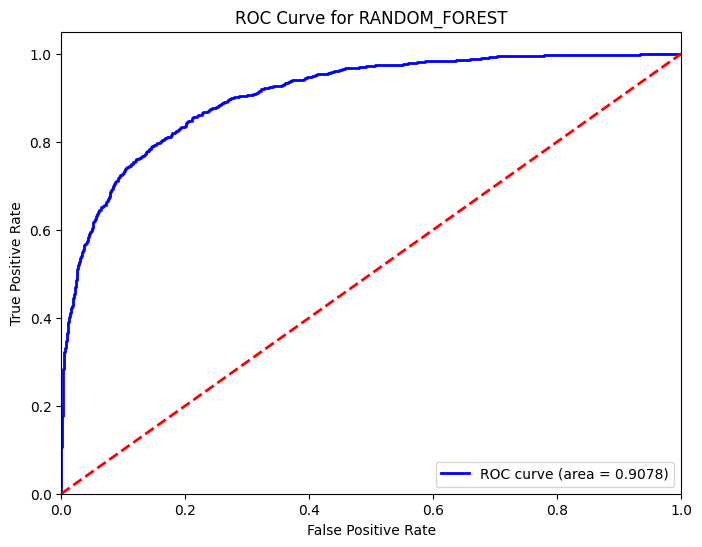

Model: GRADIENT_BOOSTING

{'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}

ROC AUC: 0.9118

Classification Report:
+--------------+--------------------+--------------------+--------------------+---------+
|              |     precision      |       recall       |      f1-score      | support |
+--------------+--------------------+--------------------+--------------------+---------+
|     0.0      | 0.9004739336492891 | 0.9547738693467337 | 0.926829268292683  | 3980.0  |
|     1.0      | 0.7692307692307693 | 0.5882352941176471 | 0.6666666666666666 | 1020.0  |
|   accuracy   |        0.88        |        0.88        |        0.88        |  0.88   |
|  macro avg   | 0.8348523514400292 | 0.7715045817321904 | 0.7967479674796748 | 5000.0  |
| weighted avg | 0.8737003281079111 |        0.88        | 0.8737560975609756 | 5000.0  |
+--------------+--------------------+--------------------+--------------------+---------+


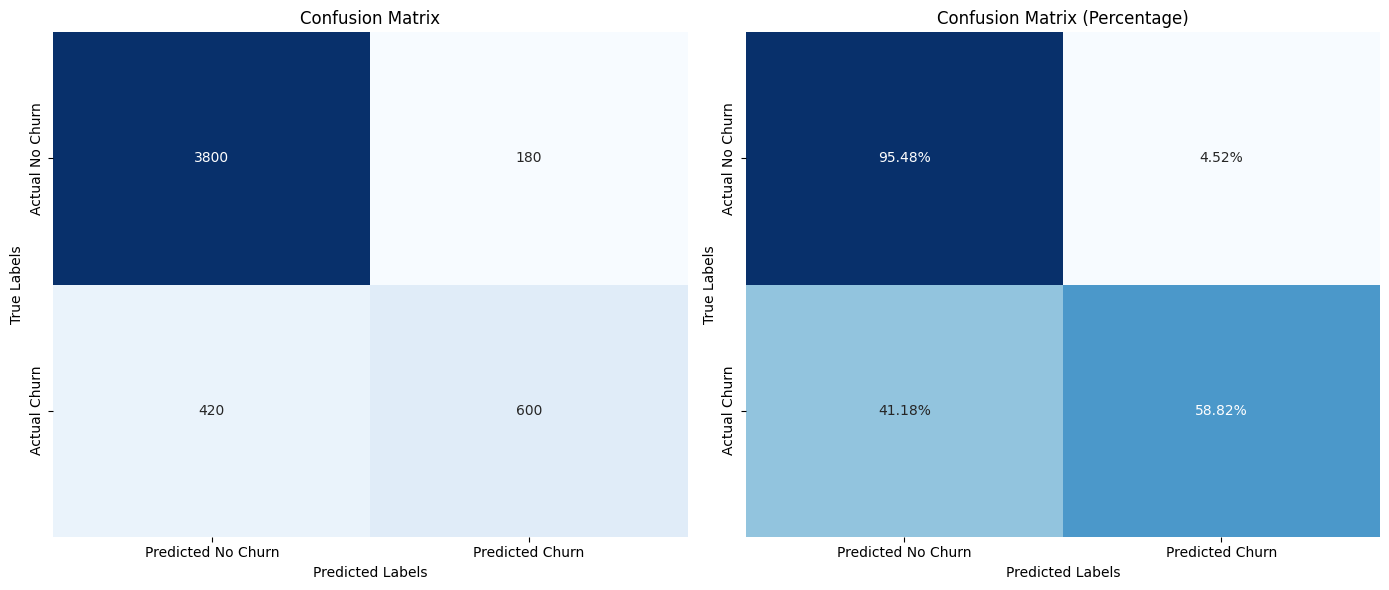

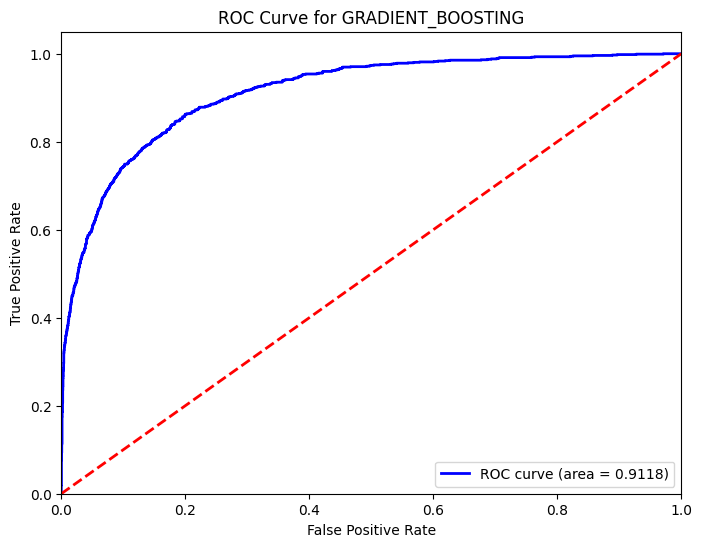

Model: XGBOOST

{'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}

ROC AUC: 0.9133

Classification Report:
+--------------+--------------------+--------------------+--------------------+---------+
|              |     precision      |       recall       |      f1-score      | support |
+--------------+--------------------+--------------------+--------------------+---------+
|     0.0      | 0.900781434998816  | 0.9557788944723619 | 0.9274655613799829 | 3980.0  |
|     1.0      | 0.7734877734877735 | 0.5892156862745098 | 0.6688925987757374 | 1020.0  |
|   accuracy   |       0.881        |       0.881        |       0.881        |  0.881  |
|  macro avg   | 0.8371346042432948 | 0.7724972903734358 | 0.7981790800778601 | 5000.0  |
| weighted avg | 0.8748135280505634 |       0.881        | 0.8747166770087169 | 5000.0  |
+--------------+--------------------+--------------------+--------------------+---------+


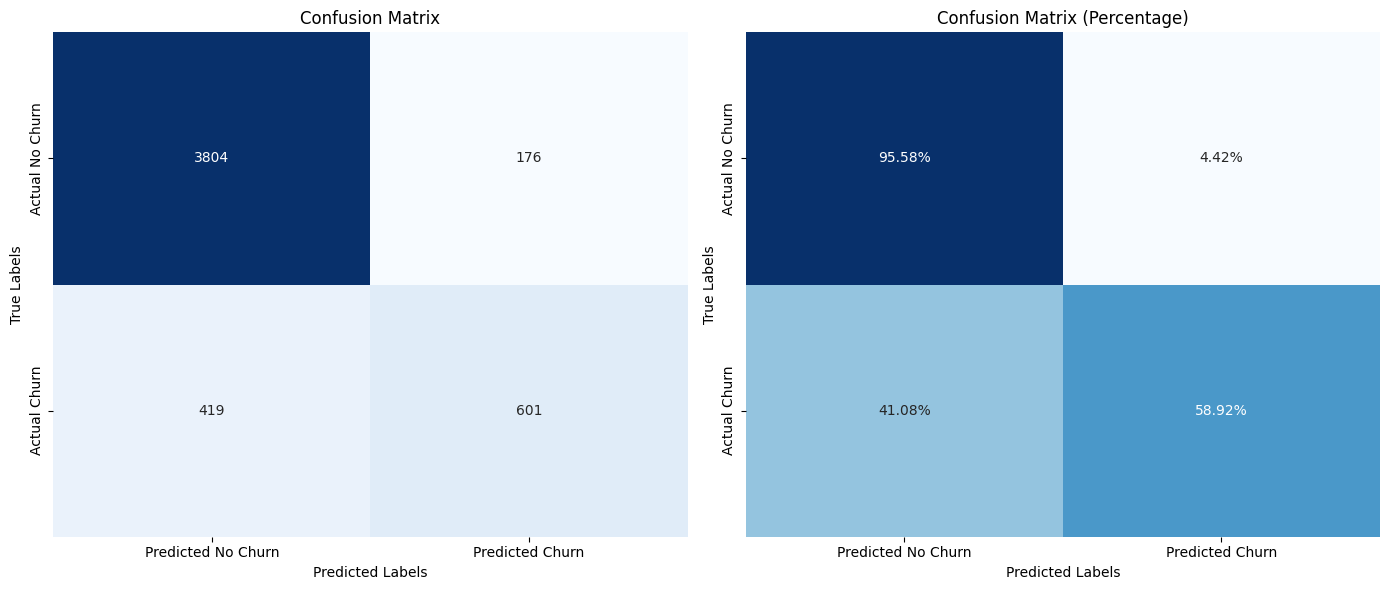

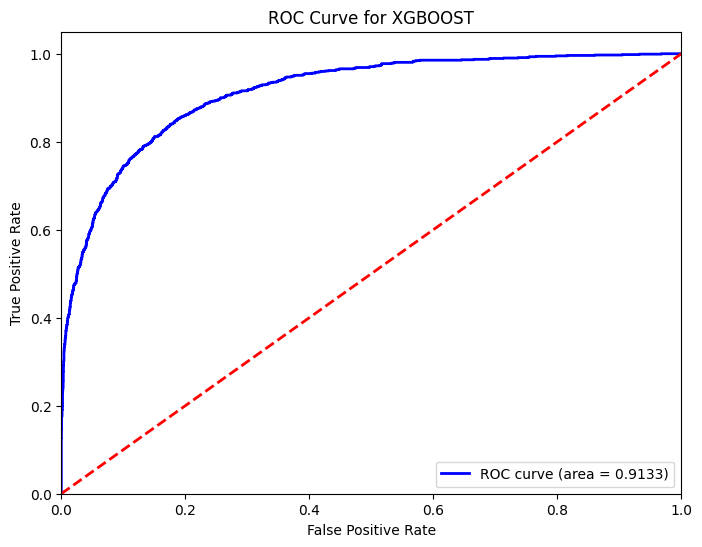

In [34]:
for result in results:
    model = result['best_estimator']
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_pred_proba)

    # Chuyển đổi thành nhãn dự đoán
    y_pred = (y_pred_proba >= 0.5).astype(int)
    conf_matrix = confusion_matrix(y_val, y_pred)
    clf_report = classification_report(y_val, y_pred, output_dict=True)
    clf_report_df = pd.DataFrame(clf_report).transpose()

    # Tính toán ROC và AUC
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc_val = auc(fpr, tpr)

    print(f"Model: {result['model'].upper()}\n")
    print(f"{result['best_params']}\n")
    print(f"ROC AUC: {roc_auc:.4f}\n")

    # Vẽ bảng Classification Report
    print("Classification Report:")
    print(tabulate(clf_report_df, headers='keys', tablefmt='pretty'))

    # Chuyển đổi ma trận nhầm lẫn thành giá trị phần trăm
    conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

    # Tạo figure với 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Vẽ ma trận nhầm lẫn
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0],
                xticklabels=['Predicted No Churn', 'Predicted Churn'],
                yticklabels=['Actual No Churn', 'Actual Churn'])
    axes[0].set_title('Confusion Matrix')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')

    # Vẽ ma trận nhầm lẫn (giá trị phần trăm)
    sns.heatmap(conf_matrix_percent, annot=True, fmt='.2%', cmap='Blues', cbar=False, ax=axes[1],
                xticklabels=['Predicted No Churn', 'Predicted Churn'],
                yticklabels=['Actual No Churn', 'Actual Churn'])
    axes[1].set_title('Confusion Matrix (Percentage)')
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('True Labels')

    # Hiển thị subplots
    plt.tight_layout()
    plt.show()
    
    
    # Vẽ ROC và AUC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_val:.4f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {result["model"].upper()}')
    plt.legend(loc='lower right')
    plt.show()

+ Dựa vào điểm ROC_AUC và ma trận nhầm lẫn, ta chọn xgboost làm mô hình để dự đoán.

In [30]:
best_model = [result['best_estimator'] for result in results if result['model'] == 'xgboost'][0]

+ Dự đoán Test Data

In [31]:
submission = best_model.predict_proba(test_df)[:, 1]

submission_df = pd.DataFrame({'id': test_df['id'], 'Exited': submission})

submission_df.to_csv('submission.csv', index=False)
submission_df.head()

,id,Exited
0,15000,0.009890
1,15001,0.229888
2,15002,0.060723
3,15003,0.906900
4,15004,0.009619
